In [65]:
import MeCab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"] = "IPAexGothic"

In [2]:
with open("neko.txt","r",encoding="utf-8_sig") as f:
    text = f.read() #ファイルの読み出し
    t = MeCab.Tagger() #MeCabの扱う準備
    x = t.parse(text) #形態素解析の実行
    
with open("neko.txt.mecab","w",encoding="utf-8_sig") as g:
          g.write(x) #ファイルの書き出し

## 第30問 形態素解析結果の読み込み

In [22]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)



#上記をtxtファイルに保存
with open("neko_result30.txt","w",encoding="utf-8_sig") as g:
    for j in ans:
        g.write("{}\n".format(j))

#pickleファイルにもしてみる
import pickle
with  open("neko_result30","wb") as nk:
    for j in ans:
        pickle.dump(j,nk)

## 第31問 動詞の表層形の抽出

In [23]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

ans_verb = []
for j in ans:
    if j["品詞"] == "動詞":
        k = j["表層形"]
        ans_verb.append(k)

#上記をtxtファイルに保存
with open("neko_result31.txt","w",encoding="utf-8_sig") as g:
    for j in ans_verb:
        g.write("{}\n".format(j))

#pickleファイルにもしてみる
import pickle
with  open("neko_result31","wb") as nk:
    for j in ans_verb:
        pickle.dump(j,nk)

## 第32問 動詞の原形の抽出

In [24]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

ans_verb = []
for j in ans:
    if j["品詞"] == "動詞":
        k = j["一般形(原形)"]
        ans_verb.append(k)

#上記をtxtファイルに保存
with open("neko_result32.txt","w",encoding="utf-8_sig") as g:
    for j in ans_verb:
        g.write("{}\n".format(j))

#pickleファイルにもしてみる
import pickle
with  open("neko_result32","wb") as nk:
    for j in ans_verb:
        pickle.dump(j,nk)

## 第33問 「AのB」の抽出

In [27]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

ans_noun = []
for s in range(len(ans)-2): #ansの長さ-2で、一番最後でStopさせる
    #なぜなら、初めに名詞句があるかもしれないから
    #ans[n番目]で要素を取ってくる形にすれば、番目を意識しつつ、辞書からデータを取得できる。
    if ans[s]["品詞"] == "名詞" and ans[s+1]["表層形"] == "の" and ans[s+2]["品詞"] == "名詞":
        k = ans[s]["表層形"] + ans[s+1]["表層形"] + ans[s+2]["表層形"]
        ans_noun.append(k)
    

#上記をtxtファイルに保存
with open("neko_result33.txt","w",encoding="utf-8_sig") as g:
    for j in ans_noun:
        g.write("{}\n".format(j))

#pickleファイルにもしてみる
import pickle
with  open("neko_result33","wb") as nk:
    for j in ans_noun:
        pickle.dump(j,nk)

## 第34問 名詞の連接の抽出

In [28]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

ans_noun = []
for s in range(len(ans)-2): #ansの長さ-2で、一番最後でStopさせる
    #なぜなら、初めに名詞句があるかもしれないから
    #ans[n番目]で要素を取ってくる形にすれば、番目を意識しつつ、辞書からデータを取得できる。
    if ans[s]["品詞"] == "名詞" and ans[s+1]["品詞"] == "名詞":
        t = s+1
        k = ans[s]["表層形"]
        while ans[t]["品詞"] == "名詞":
            k = k + ans[t]["表層形"]
            t = t + 1
        ans_noun.append(k)

#上記をtxtファイルに保存
with open("neko_result34.txt","w",encoding="utf-8_sig") as g:
    for j in ans_noun:
        g.write("{}\n".format(j))

#pickleファイルにもしてみる
import pickle
with  open("neko_result34","wb") as nk:
    for j in ans_noun:
        pickle.dump(j,nk)

## 第35問 単語の出現頻度

In [34]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

from collections import Counter
ans_count = []
for s in ans:
    ans_count.append(s["表層形"])
count = Counter(ans_count)

#上記をtxtファイルに保存
with open("neko_result35.txt","w",encoding="utf-8_sig") as g:
    g.write("{}".format(count))

#pickleファイルにもしてみる
import pickle
with  open("neko_result35","wb") as nk:
    pickle.dump(count,nk)

## 第36問 単語出現頻度上位10

[('の', 9194), ('。', 7486), ('て', 6873), ('、', 6772), ('は', 6422), ('に', 6268), ('を', 6071), ('と', 5515), ('が', 5339), ('た', 3989)]
('の', 9194)
9194
['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が']
[9194, 7486, 6873, 6772, 6422, 6268, 6071, 5515, 5339]


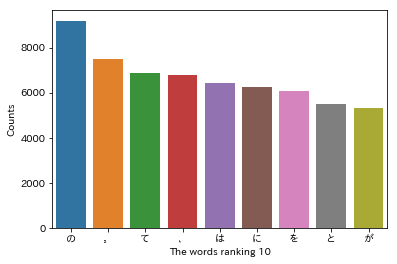

In [5]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

from collections import Counter
ans_count = []
for s in ans:
    ans_count.append(s["表層形"])
count = Counter(ans_count)

count_10 = count.most_common(10)



print(count_10)

print(count_10[0])

print(count_10[0][1])

x = []
y = []
for i in range(len(count_10)-1):
    x.append(count_10[i][0])
    y.append(count_10[i][1])

print(x)
print(y)
plt.xlabel("The words ranking 10")
plt.ylabel("Counts")
sns.barplot(x,y)
#グラフに表示


#グラフに表示
#target = list(zip(*count_10))
#plt.bar(*target)
#plt.show()


## 第37問 猫との共起頻度上位10

#### ①猫の一つ後ろの単語を抽出
#### ②猫の後ろの「名詞」の単語のみ抽出
#### ③猫の後ろの「名詞」の単語のみ抽出(猫は除く)

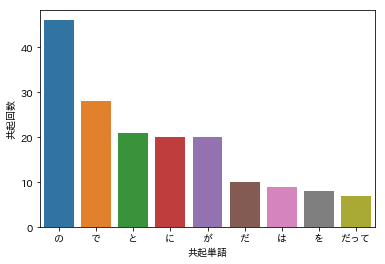

In [12]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

ans_1 = []

for s in range(len(ans)-2): #ansの長さ-2で、一番最後でStopさせる
    if ans[s]["表層形"] == "猫":
        k = ans[s+1]["表層形"]
        ans_1.append(k) #"猫"の後ろについている単語のリスト

from collections import Counter

ans_count = []

for t in ans_1:
    ans_count.append(t)
count = Counter(ans_count) #"猫"の後ろについている単語の数を数えてリスト化

count_kyoki_10 = count.most_common(10)

x_kyoki = []
y_kyoki = []

for i in range(len(count_kyoki_10)-1):
    x_kyoki.append(count_kyoki_10[i][0])
    y_kyoki.append(count_kyoki_10[i][1])

plt.xlabel("共起単語")
plt.ylabel("共起回数")

sns.barplot(x_kyoki,y_kyoki)

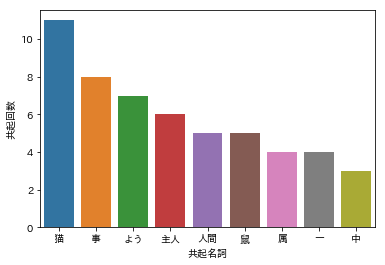

In [20]:
#"猫"と共起する名詞を抽出

with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

ans_1 = []

for s in range(len(ans)-2): #ansの長さ-2で、一番最後でStopさせる
    if ans[s]["表層形"] == "猫":
        t = s + 1
        while ans[t]["品詞"] != "名詞":
            t = t + 1
        k = ans[t]["表層形"] 
        ans_1.append(k) #"猫"の後ろについている単語のリスト

from collections import Counter

ans_count = []

for t in ans_1:
    ans_count.append(t)
count = Counter(ans_count) #"猫"の後ろについている単語の数を数えてリスト化

count_kyoki_10 = count.most_common(10)

x_kyoki = []
y_kyoki = []

for i in range(len(count_kyoki_10)-1):
    x_kyoki.append(count_kyoki_10[i][0])
    y_kyoki.append(count_kyoki_10[i][1])

plt.xlabel("共起名詞")
plt.ylabel("共起回数")

sns.barplot(x_kyoki,y_kyoki)

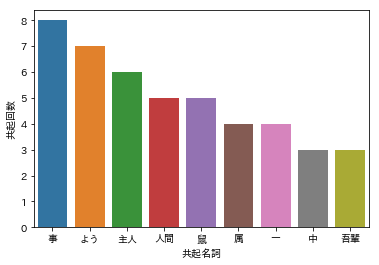

In [21]:
#"猫"と共起する名詞を抽出(猫は除く)

with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

ans_1 = []

for s in range(len(ans)-2): #ansの長さ-2で、一番最後でStopさせる
    if ans[s]["表層形"] == "猫":
        t = s + 1
        while ans[t]["品詞"] != "名詞":
            t = t + 1
        if ans[t]["表層形"] == "猫":
            continue
        k = ans[t]["表層形"] 
        ans_1.append(k) #"猫"の後ろについている単語のリスト

from collections import Counter

ans_count = []

for t in ans_1:
    ans_count.append(t)
count = Counter(ans_count) #"猫"の後ろについている単語の数を数えてリスト化

count_kyoki_10 = count.most_common(10)

x_kyoki = []
y_kyoki = []

for i in range(len(count_kyoki_10)-1):
    x_kyoki.append(count_kyoki_10[i][0])
    y_kyoki.append(count_kyoki_10[i][1])

plt.xlabel("共起名詞")
plt.ylabel("共起回数")

sns.barplot(x_kyoki,y_kyoki)

## 第38問 ヒストグラム

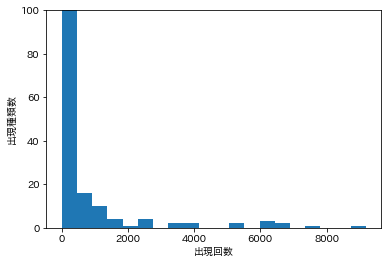

In [71]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

from collections import Counter

ans_count = []

for t in ans:
    ans_count.append(t["表層形"])

count = Counter(ans_count) #"猫"の後ろについている単語の数を数えてリスト化

count_kyoki_all = count.most_common()

c = []
for i in range(len(count_kyoki_all)):
    c.append(count_kyoki_all[i][1])

#1回出てくるのは何個？2は何個？...
plt.hist(c,bins=20)
plt.xlabel("出現回数")
plt.ylabel("出現種類数")
plt.ylim(0,100) #100以上はカット
plt.show()

## 第39問 Zipfの法則(両対数グラフにすると直線になる)

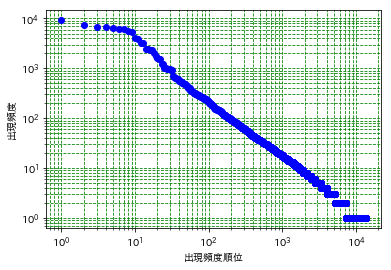

In [57]:
with open("neko.txt.mecab","r",encoding="utf-8_sig") as f:
    text = f.read().split("\n") #1行ごとに分割してリスト化

ans = []

for i in text:
    if i == 'EOS':
        break
    ls = i.split('\t') #ls[0]は表層形,ls[1]は品詞,品詞細分類1,.,活用形,原形,読み,発音
    ks = ls[1].split(',')
    d = {
        '表層形': ls[0],
        '一般形(原形)': ks[6],
        '品詞': ks[0],
        '品詞細分類1': ks[1]
    }
    ans.append(d)

from collections import Counter

ans_count = []

for t in ans:
    ans_count.append(t["表層形"])

count = Counter(ans_count) #"猫"の後ろについている単語の数を数えてリスト化

count_kyoki_all = count.most_common()

c = []
num = []
for i in range(len(count_kyoki_all)):
    c.append(count_kyoki_all[i][1])
    num.append(i+1)

plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.xscale("log")
plt.yscale("log")
plt.plot(num,c,"bo")
plt.grid(True,which="both",ls="--",color="g")
plt.show()